In [145]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [146]:
data=pd.read_csv("C:/Users/ASUS/Desktop/MetehanHocaDDO/drug200.csv")

<Axes: >

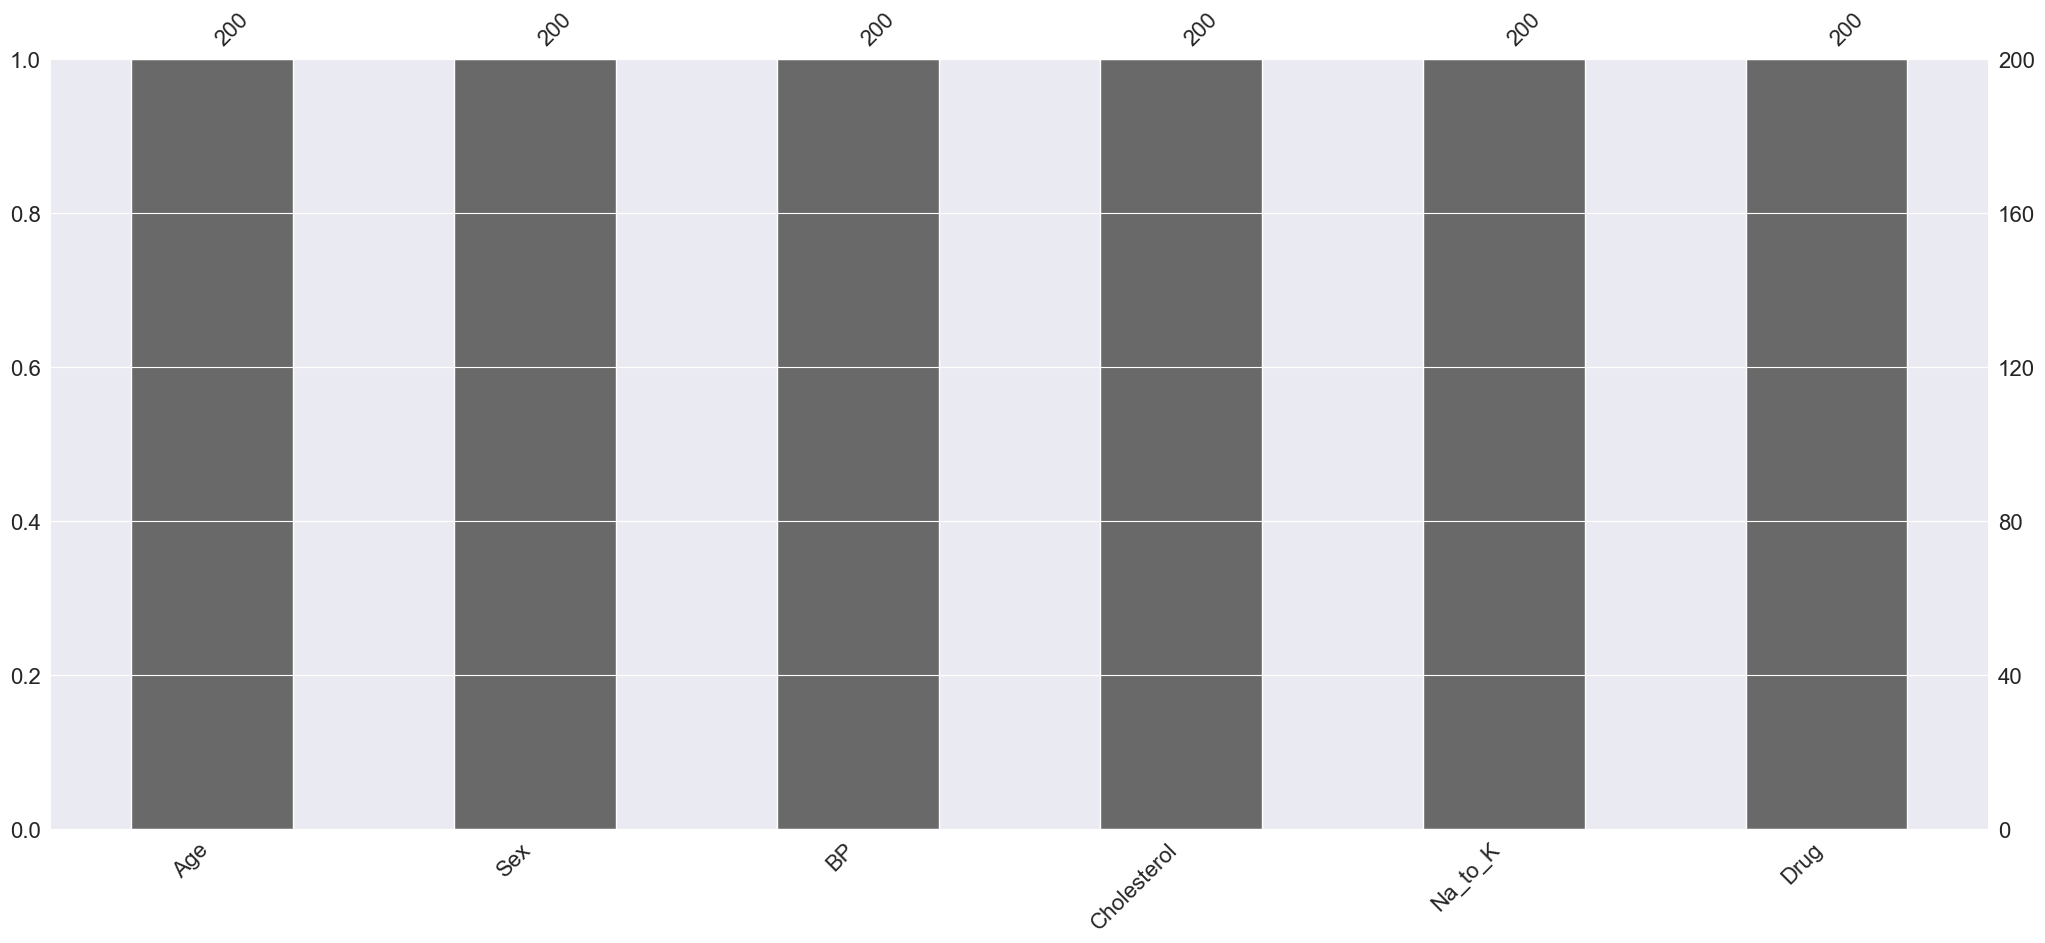

In [147]:
import missingno as msno
msno.bar(data)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [149]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [150]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
ordEnc=OrdinalEncoder()
data[["BP","Cholesterol"]]=ordEnc.fit_transform(data[["BP",'Cholesterol']])

In [151]:
ohEnc=OneHotEncoder()
dataEnc=ohEnc.fit_transform(data[["Sex"]])
data=pd.concat([data,pd.DataFrame(dataEnc.toarray(),columns=ohEnc.get_feature_names_out().tolist())],axis=1)
data.drop("Sex",axis=1,inplace=True)

In [152]:
data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [153]:
labEnc=LabelEncoder()
labEnc.fit(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
data["Drug"]=labEnc.transform(data["Drug"])
data.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,0.0,0.0,25.355,4,1.0,0.0
1,47,1.0,0.0,13.093,2,0.0,1.0
2,47,1.0,0.0,10.114,2,0.0,1.0
3,28,2.0,0.0,7.798,3,1.0,0.0
4,61,1.0,0.0,18.043,4,1.0,0.0


In [154]:
y=data["Drug"]
X=data.drop("Drug",axis=1)

In [155]:
y.value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [157]:
y.value_counts()

Drug
4    91
2    91
3    91
0    91
1    91
Name: count, dtype: int64

In [158]:
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [160]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
kfold=KFold(n_splits=5)
model=GridSearchCV(DecisionTreeClassifier(),refit = True, verbose=2,cv=kfold,param_grid=param_grid,scoring='accuracy').fit(X_train,y_train)
pred=model.predict(X_test)




Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

In [161]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix


In [162]:
confusion_matrix(y_test,pred)

array([[18,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 19]])

In [163]:
accuracy_score(y_test,pred)

1.0

In [164]:
recall_score(y_test,pred,average='weighted')


np.float64(1.0)